### import necessary libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
lable=KMeans
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierar

### Load data from an Excel file

In [2]:

df_Customer_sales=pd.read_excel('RFM.xlsx')

In [3]:
df_Customer_sales.head()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
0,9000517,2023-06-30,18,900062,1951222.4,13
1,9000574,2022-09-13,3,844958,152250.0,44
2,9000574,2022-10-01,3,846402,139900.0,44
3,9000574,2022-06-19,1,837214,359000.0,44
4,9000574,2022-06-18,2,837146,144000.0,44


### Remove row with missing CustomerCode

In [4]:
df_Customer_sales.dropna(subset=['CustomerCode'],how='all',inplace=True)
df_Customer_sales.shape

(57310, 6)

### Check data type and null values

In [5]:
df_Customer_sales.dtypes

CustomerCode                 int64
CreatedDate         datetime64[ns]
QtyFinal                     int64
orderIncrementId            object
SaleAmount                 float64
productdiversity             int64
dtype: object

In [6]:
df_Customer_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57310 entries, 0 to 57309
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerCode      57310 non-null  int64         
 1   CreatedDate       57310 non-null  datetime64[ns]
 2   QtyFinal          57310 non-null  int64         
 3   orderIncrementId  57310 non-null  object        
 4   SaleAmount        57310 non-null  float64       
 5   productdiversity  57310 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 2.6+ MB


In [7]:
df_Customer_sales.isnull().sum().sort_values(ascending=False)

CustomerCode        0
CreatedDate         0
QtyFinal            0
orderIncrementId    0
SaleAmount          0
productdiversity    0
dtype: int64

### Filter data base on quantity and sale amount

In [8]:
df_Customer_sales = df_Customer_sales[(df_Customer_sales['QtyFinal']>0) & (df_Customer_sales['SaleAmount']>0)] 
df_Customer_sales.describe()

,CustomerCode,QtyFinal,SaleAmount,productdiversity
count,5.715400e+04,57154.000000,5.715400e+04,57154.000000
mean,9.153739e+06,5.161354,5.693502e+05,52.025475
std,6.275768e+04,217.909405,1.779662e+06,176.945693
min,9.000517e+06,1.000000,2.710000e+01,1.000000
25%,9.123677e+06,1.000000,2.050000e+05,2.000000
50%,9.170940e+06,2.000000,3.500000e+05,7.000000
75%,9.195378e+06,4.000000,5.990400e+05,29.000000
max,9.242351e+06,52000.000000,1.371840e+08,1487.000000


### Remove duplicate row 

In [9]:
df_Customer_sales=df_Customer_sales.drop_duplicates()
df_Customer_sales.shape

(57154, 6)

In [10]:
print(df_Customer_sales['CreatedDate'].min(),df_Customer_sales['CreatedDate'].max())

2021-05-21 00:00:00 2023-08-30 00:00:00


In [11]:
today = date.today()
print("Today's date:", today)

Today's date: 2023-10-16


### Convert  'CreatedDate' into datetime

In [12]:
In [32]: df_Customer_sales['CreatedDate'] = df_Customer_sales['CreatedDate'].astype('datetime64[ns]')
df_Customer_sales

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity
0,9000517,2023-06-30,18,900062,1951222.4,13
1,9000574,2022-09-13,3,844958,152250.0,44
2,9000574,2022-10-01,3,846402,139900.0,44
3,9000574,2022-06-19,1,837214,359000.0,44
4,9000574,2022-06-18,2,837146,144000.0,44
...,...,...,...,...,...,...
57305,9242314,2023-08-30,1,913894,685000.0,1
57306,9242326,2023-08-30,3,913888,633550.0,3
57307,9242332,2023-08-30,1,913899,64900.0,1
57308,9242332,2023-08-30,1,913896,64900.0,1


In [13]:
print(type(today))
print(type(df_Customer_sales['CreatedDate']))

<class 'datetime.date'>
<class 'pandas.core.series.Series'>


### Calculate reecency as the difference between today and 'CreateDate'

In [14]:
df_Customer_sales['history_day']=pd.to_datetime(today)- df_Customer_sales['CreatedDate']
df_Customer_sales['history_day'].astype('timedelta64[D]')
df_Customer_sales['history_day']=df_Customer_sales['history_day'] / np.timedelta64(1, 'D')
df_Customer_sales.head()

,CustomerCode,CreatedDate,QtyFinal,orderIncrementId,SaleAmount,productdiversity,history_day
0,9000517,2023-06-30,18,900062,1951222.4,13,108.0
1,9000574,2022-09-13,3,844958,152250.0,44,398.0
2,9000574,2022-10-01,3,846402,139900.0,44,380.0
3,9000574,2022-06-19,1,837214,359000.0,44,484.0
4,9000574,2022-06-18,2,837146,144000.0,44,485.0


In [15]:
In [28]: df_Customer_sales['CreatedDate'].astype('datetime64[D]').tolist()

[Timestamp('2023-06-30 00:00:00'),
 Timestamp('2022-09-13 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-06-19 00:00:00'),
 Timestamp('2022-06-18 00:00:00'),
 Timestamp('2022-09-20 00:00:00'),
 Timestamp('2022-08-13 00:00:00'),
 Timestamp('2022-09-19 00:00:00'),
 Timestamp('2022-06-18 00:00:00'),
 Timestamp('2022-08-06 00:00:00'),
 Timestamp('2022-07-16 00:00:00'),
 Timestamp('2022-07-17 00:00:00'),
 Timestamp('2022-04-27 00:00:00'),
 Timestamp('2022-09-03 00:00:00'),
 Timestamp('2022-08-29 00:00:00'),
 Timestamp('2022-10-19 00:00:00'),
 Timestamp('2022-06-27 00:00:00'),
 Timestamp('2022-03-27 00:00:00'),
 Timestamp('2023-08-29 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-04-25 00:00:00'),
 Timestamp('2021-12-27 00:00:00'),
 Timestamp('2022-01-24 00:00:00'),
 Timestamp('2023-07-06 00:00:00'),
 Timestamp('2023-06-18 00:00:00'),
 Timestamp('2021-12-28 00:00:00'),
 Timestamp('2023-07-02 00:00:00'),
 Timestamp('2023-05-

### Group data by 'CustomerCode' and aggregate RFM metric

In [16]:
df_RFM =df_Customer_sales.groupby('CustomerCode').agg({'CustomerCode': lambda x:x.min() ,
                                           'history_day': lambda x:x.min() , # Recency
                                           'orderIncrementId': lambda x: len(x) ,# Frequency تعداد دفعات خريد
                                           'SaleAmount': lambda x: x.sum() , #Monetary Value
                                           'productdiversity' : lambda x: x.max()})#

### Rename column for clarity

In [17]:
df_RFM.rename(columns={'CustomerCode':'CustomerCode',
                         'history_day': 'recency', 
                         'orderIncrementId': 'frequency', 
                         'SaleAmount': 'monetary_value',
                         'productdiversity' : 'Productdiversity'
}, inplace=True)
df_RFM

,CustomerCode,recency,frequency,monetary_value,Productdiversity
CustomerCode,,,,,
9000517,9000517,108.0,1,1.951222e+06,13
9000574,9000574,362.0,16,6.325659e+07,44
9000577,9000577,568.0,1,4.400000e+05,2
9000591,9000591,48.0,259,2.121547e+08,499
9000596,9000596,161.0,7,2.660125e+06,12
...,...,...,...,...,...
9242307,9242307,47.0,1,9.513000e+05,1
9242314,9242314,47.0,1,6.850000e+05,1
9242326,9242326,47.0,1,6.335500e+05,3


### Calculate quartiles for further analytic

In [18]:
quartiles = df_RFM.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      CustomerCode  recency  frequency  monetary_value  Productdiversity
0.25    9165392.75    147.0        1.0        236100.0               1.0
0.50    9181786.50    264.0        1.0        445000.0               3.0
0.75    9205406.75    518.0        1.0        891000.0               6.0 <class 'pandas.core.frame.DataFrame'>


In [19]:
quartiles=quartiles.to_dict()
quartiles

{'CustomerCode': {0.25: 9165392.75, 0.5: 9181786.5, 0.75: 9205406.75},
 'recency': {0.25: 147.0, 0.5: 264.0, 0.75: 518.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 236100.0, 0.5: 445000.0, 0.75: 891000.0},
 'Productdiversity': {0.25: 1.0, 0.5: 3.0, 0.75: 6.0}}

### Define the RClass function to categorize Recency (R) and Define FMDClass function to categorize Frequency and Monetary Value(F and M)

In [20]:
def RClass(x,p,d):

    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# for Frequency and Monetary value 

def FMDClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

### Create an 'RFMClass' column by combining R, F, and M quartiles

In [21]:
RFM_Segmentation = df_RFM
RFM_Segmentation['R_Quartile'] = RFM_Segmentation['recency'].apply(RClass, args=('recency',quartiles,))
RFM_Segmentation['F_Quartile'] = RFM_Segmentation['frequency'].apply(FMDClass, args=('frequency',quartiles,))
RFM_Segmentation['M_Quartile'] = RFM_Segmentation['monetary_value'].apply(FMDClass, args=('monetary_value',quartiles,))
RFM_Segmentation['Productdiversity']  = RFM_Segmentation['Productdiversity'].apply(FMDClass, args=('Productdiversity',quartiles,))

In [22]:
RFM_Segmentation

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile
CustomerCode,,,,,,,,
9000517,9000517,108.0,1,1.951222e+06,1,1,4,1
9000574,9000574,362.0,16,6.325659e+07,1,3,1,1
9000577,9000577,568.0,1,4.400000e+05,3,4,4,3
9000591,9000591,48.0,259,2.121547e+08,1,1,1,1
9000596,9000596,161.0,7,2.660125e+06,1,2,1,1
...,...,...,...,...,...,...,...,...
9242307,9242307,47.0,1,9.513000e+05,4,1,4,1
9242314,9242314,47.0,1,6.850000e+05,4,1,4,2
9242326,9242326,47.0,1,6.335500e+05,3,1,4,2


In [23]:
RFM_Segmentation['RFMClass'] = RFM_Segmentation.R_Quartile.map(str) \
                     + RFM_Segmentation.F_Quartile.map(str) \
                     + RFM_Segmentation.M_Quartile.map(str) \
#                      + rfmSeg.Productdiversity.map(str)

In [24]:
RFM_Segmentation.head(2)

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerCode,,,,,,,,,
9000517,9000517,108.0,1,1951222.4,1,1,4,1,141
9000574,9000574,362.0,16,63256590.0,1,3,1,1,311


### Sort the data base on RFMClass and monetary value

In [25]:
RFM_Segmentation.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerCode,,,,,,,,,
9170046,9170046,47.0,714,4.074417e+08,1,1,1,1,111
9001134,9001134,90.0,10,2.714529e+08,1,1,1,1,111
9000591,9000591,48.0,259,2.121547e+08,1,1,1,1,111
9183852,9183852,93.0,2,1.135900e+08,3,1,1,1,111
9041014,9041014,48.0,51,8.499765e+07,1,1,1,1,111
...,...,...,...,...,...,...,...,...,...
9045273,9045273,796.0,1,8.000000e+03,4,4,4,4,444
9167547,9167547,688.0,1,6.370000e+03,1,4,4,4,444
9162991,9162991,641.0,1,4.500000e+03,4,4,4,4,444


### Calculate the count of each RFMClass

In [26]:
RFM_Segmentation.groupby('RFMClass').agg('F_Quartile').count()

RFMClass
111    2193
112     357
113      64
114      30
141    1254
142    1802
143    1137
144     983
211    1321
212     493
213     111
214      34
241     970
242    1709
243    1736
244    1374
311     769
312     395
313     125
314      44
341     460
342    1580
343    2336
344    2002
411     537
412     546
413     315
414      73
441     248
442     867
443    1939
444    3216
Name: F_Quartile, dtype: int64

### Calculate the total score by suming R, F, nad M quartiles

In [27]:
RFM_Segmentation['Total Score'] = RFM_Segmentation['R_Quartile'] + RFM_Segmentation['F_Quartile'] +RFM_Segmentation['M_Quartile']
RFM_Segmentation.head(2)

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
CustomerCode,,,,,,,,,,
9000517,9000517,108.0,1,1951222.4,1,1,4,1,141,6
9000574,9000574,362.0,16,63256590.0,1,3,1,1,311,5


### Calculate the mean product diversity for each total score and create  a bar plot

<AxesSubplot:xlabel='Total Score'>

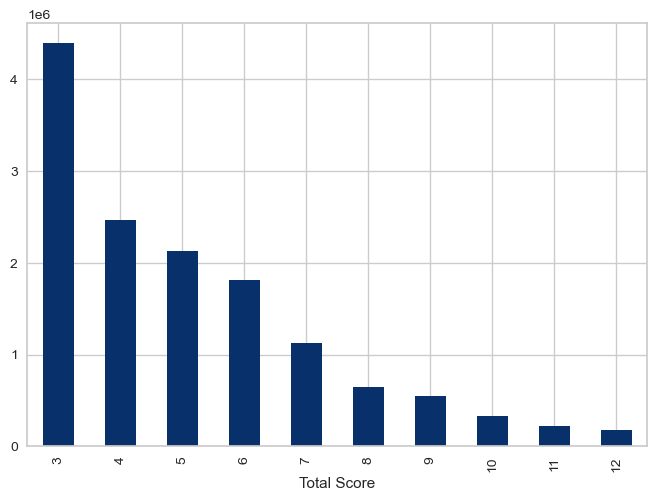

In [28]:
RFM_Segmentation.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

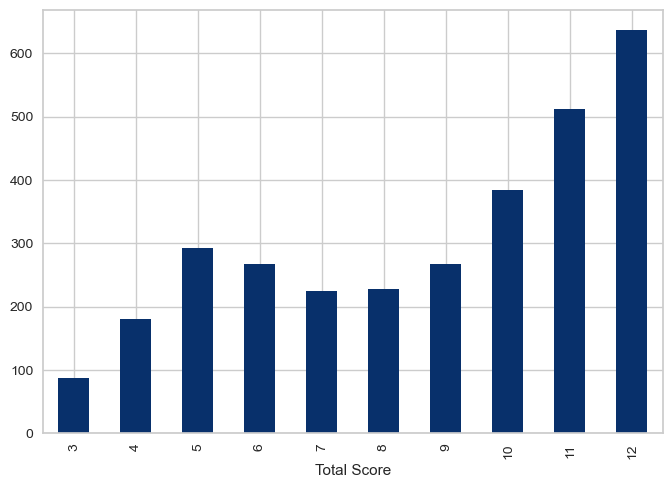

In [29]:
RFM_Segmentation.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

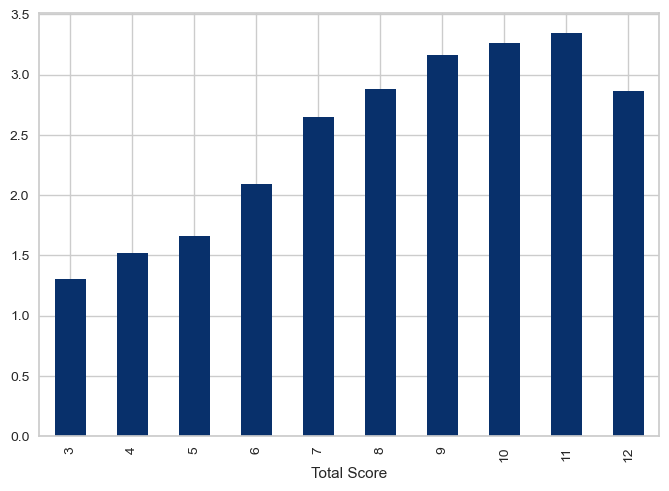

In [30]:
RFM_Segmentation.groupby('Total Score').agg('Productdiversity').mean().plot(kind='bar', colormap='Blues_r')

In [31]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['Total Score'], c=colors[n-1]) #clustered_df['recency'], 
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

In [32]:
RFM_Segmentation.iloc[5:,0:3]

,CustomerCode,recency,frequency
CustomerCode,,,
9000609,9000609,588.0,4
9000616,9000616,628.0,2
9000617,9000617,260.0,13
9000625,9000625,609.0,1
9000634,9000634,589.0,2
...,...,...,...
9242307,9242307,47.0,1
9242314,9242314,47.0,1
9242326,9242326,47.0,1


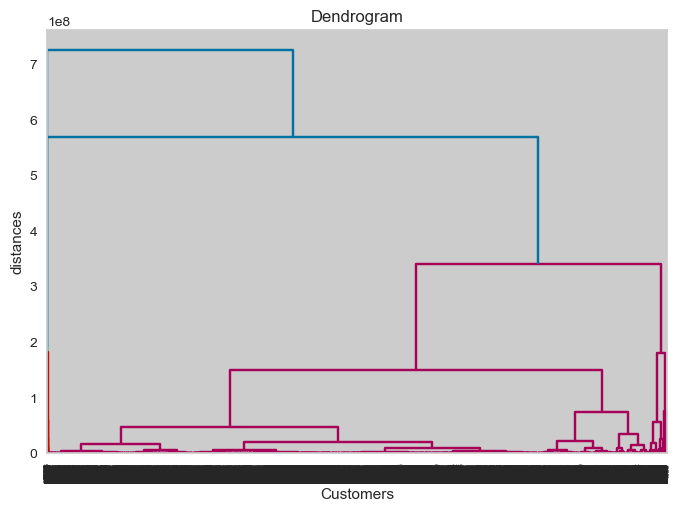

In [33]:
dendrogram = hierar.dendrogram(hierar.linkage(RFM_Segmentation.iloc[:,3:].values, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

### determine the optimal number of clusters using the Elbow method

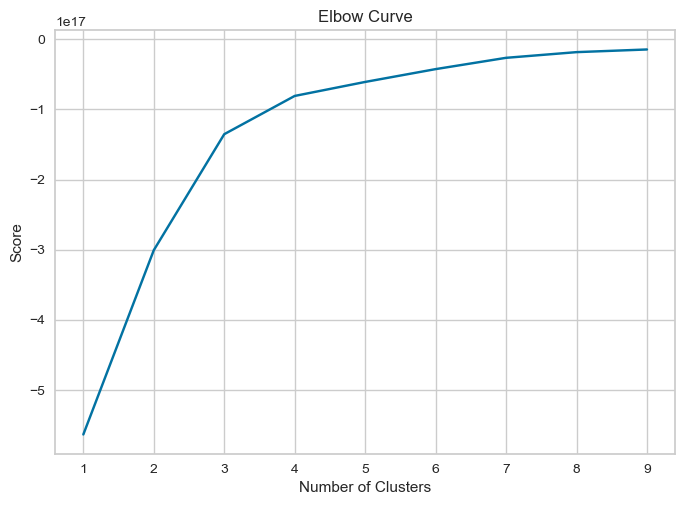

In [36]:
from sklearn.cluster import KMeans
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(RFM_Segmentation).score(RFM_Segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Perform KMeans clustering with 4clusters

In [37]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(RFM_Segmentation)

In [38]:
RFM_Segmentation['Cluster'] = kmeans.labels_
RFM_Segmentation

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Cluster
CustomerCode,,,,,,,,,,,
9000517,9000517,108.0,1,1.951222e+06,1,1,4,1,141,6,0
9000574,9000574,362.0,16,6.325659e+07,1,3,1,1,311,5,1
9000577,9000577,568.0,1,4.400000e+05,3,4,4,3,443,11,0
9000591,9000591,48.0,259,2.121547e+08,1,1,1,1,111,3,2
9000596,9000596,161.0,7,2.660125e+06,1,2,1,1,211,4,0
...,...,...,...,...,...,...,...,...,...,...,...
9242307,9242307,47.0,1,9.513000e+05,4,1,4,1,141,6,0
9242314,9242314,47.0,1,6.850000e+05,4,1,4,2,142,7,0
9242326,9242326,47.0,1,6.335500e+05,3,1,4,2,142,7,0


In [39]:
print("Number of Cluster: ", RFM_Segmentation['Cluster'].nunique())

Number of Cluster:  4


In [41]:
RFM_Segmentation[RFM_Segmentation.Cluster == 0].head(10)

,CustomerCode,recency,frequency,monetary_value,Productdiversity,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,Cluster
CustomerCode,,,,,,,,,,,
9000517,9000517,108.0,1,1951222.4,1,1,4,1,141,6,0
9000577,9000577,568.0,1,440000.0,3,4,4,3,443,11,0
9000596,9000596,161.0,7,2660125.0,1,2,1,1,211,4,0
9000616,9000616,628.0,2,430616.0,2,4,1,3,413,8,0
9000617,9000617,260.0,13,3227900.0,1,2,1,1,211,4,0
9000625,9000625,609.0,1,270000.0,4,4,4,3,443,11,0
9000634,9000634,589.0,2,493410.0,2,4,1,2,412,7,0
9000637,9000637,549.0,2,561200.0,1,4,1,2,412,7,0
9000640,9000640,348.0,4,1529000.0,2,3,1,1,311,5,0


### Create scatter plotsfor varous combinationof variabloes

NameError: name 'sns' is not defined

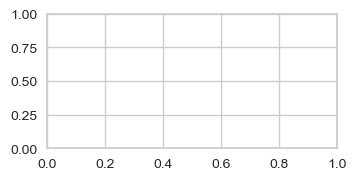

In [42]:
    plt.figure(1 , figsize = (15 , 7))
    n = 0 
    for x in ['recency' , 'frequency' , 'monetary_value']:
        for y in ['recency' , 'frequency' , 'monetary_value']:
            n += 1
            plt.subplot(3 , 3 , n)
            plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
            sns.regplot(x = x , y = y , data = RFM_Segmentation)
            plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
    plt.show()